In [2]:
import numpy as np
import pandas as pd
import os

# This notebook is meant to familiarize the reader with the data used for fine-tuning the BERT model employed for the tasks of sentiment classification and key phrase extraction. 
# The notebook is organized as follows:


- Datasets employed
    - dataset 1 exploration
    - dataset 2 exploration
- Final dataset generation
    - Final dataset exploration



## Datasets employed

- Two distinct dataset were employed to create the final dataset. The sets contain financial news headlines and sentences extracted from news. The fisrt set was generated by Malo et al.(2013) and the second one by Sousa et al.(2019). Below the reader is familiarized with both.

### Dataset 1 - The Financial News Phrase Bank

- [The Financial News Phrase Bank (Malo,et al.,2013)](https://www.researchgate.net/publication/251231107_Good_Debt_or_Bad_Debt_Detecting_Semantic_Orientations_in_Economic_Texts)  consists of 4840 financial news headlines relating to companies present in the OMX Helsinki - an index of companies listed in the Helsinki stock exchange. The headliens have been labelled on a terneray scale of negative, neutral or positive by 5-8 annotators, all experts in the finance domain. 

In [3]:
PATH= os.path.join("..","external_datasets")
SRC = os.path.join(PATH,'Phrase_bank_sentences.txt')
# Convert the txt document to a pandas DataFrame and drop any duplicated observations.
phrase_bank = pd.read_csv(SRC, delimiter='@', names=['headlines','sentiment']).drop_duplicates(subset=['headlines'],keep='first')

Some of the observations.

In [4]:
phrase_bank

,headlines,sentiment
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive
...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,negative
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral
4843,Operating profit fell to EUR 35.4 mn from EUR ...,negative
4844,Net sales of the Paper segment decreased to EU...,negative


The label distribution is heavily scewed towards netural observations and negative ones are the most underrepresented as seen below.

In [5]:
phrase_bank.sentiment.value_counts()

neutral     2872
positive    1362
negative     604
Name: sentiment, dtype: int64

Below the reader can see a histogram of the distribution of word counts of the observations

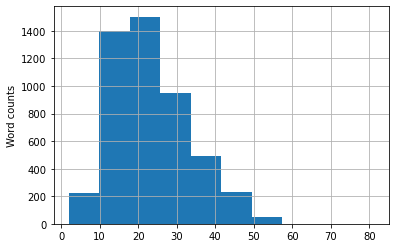

In [6]:
phrase_bank['word_count'] = phrase_bank.headlines.str.split().apply(len)

word_count = phrase_bank['word_count'].hist().set_ylabel("Word counts")

### Dataset 2 - Sousa et al. (2019)

- The dataset was generated by [Sousa et al. (2019)](https://github.com/stocks-predictor/bert) and used for their research. It is freely distributed and consists of 1109 observations. Each observation has the following attributes: headline texts(first one or two sentences in the article that depict the headline), headline title, index, hour and site and date. The data was collected from May 26th to February 4th, 2019 and it includes numerous sources such as: CNBC, Washington Post, New York Times, Forbes, Business Insider, and others.

In [7]:
SRC2=os.path.join(PATH,'datasetEconomyNews.json')
# Convert the json file to a pandas Dataframe and drop the duplicates in column headlineText.
fin_news=pd.read_json(SRC2).drop_duplicates(subset=['headlineText'])

Some of the observations

In [8]:
fin_news

,classification,headlineText,headlineTitle,idx,hour,siteAndDate
0,1,"President Trump said there was a “very, very g...","U.S. and China Extend Talks, but Final Deal Re...",0.0,NaN,NaN
1,1,Despite talk that the dollar was losing domina...,The Dollar Is Still King. How (in the World) D...,1.0,NaN,NaN
2,0,The battle over Amazon’s New York plans resurf...,Labor’s Hard Choice in Amazon Age: Play Along ...,2.0,NaN,NaN
3,0,"Amazon may not call it home. But the city, by ...",It Started With a Jolt: How New York Became a ...,3.0,NaN,NaN
4,0,"As a March deadline approaches, American negot...",U.S. Wrangles China for Firm Commitments as Tr...,4.0,NaN,NaN
...,...,...,...,...,...,...
1104,0,The stock market has seen a sharp correction o...,8 big mistakes to avoid in a falling stock market,576.0,NaN,Economic Times-1 de out de 2017
1105,0,It can be a cyclical business that's dependent...,2 Stocks You Probably Had No Idea Could Benefi...,577.0,NaN,Motley Fool-29 de mai de 2017
1106,0,These Chinese stocks are set to pop after new ...,These Chinese stocks are set to pop after new ...,578.0,NaN,CNBC-4 de abr de 2017
1107,0,The portfolio with 15 stocks has an eclectic m...,The Defence Portfolio – grab the Rs 15 lakh cr...,580.0,NaN,Moneycontrol.com-23 de jun de 2017


For the purposes of this project, the only two column of interest are the classification and headlineText columns. The rest will be dropped and the remaining renamed to match the columns of dataset 1, which will ease merging later on. Additionally, the ternary numericla scale used for classification (-1,0,1) is replaced by neutral,negative and positive.

In [9]:
# Drop all columns but the first two and rearrange them
fin_news=fin_news.iloc[::,:2][['headlineText','classification']]
# Rename the columns to match the names used in dataset 1
fin_news.columns=['headlines','sentiment']
# Replace the values in the sentiment column
replace_values ={'sentiment':{-1:'negative',1:'positive',0:'neutral'}}
fin_news=fin_news.replace(replace_values)
fin_news

,headlines,sentiment
0,"President Trump said there was a “very, very g...",positive
1,Despite talk that the dollar was losing domina...,positive
2,The battle over Amazon’s New York plans resurf...,neutral
3,"Amazon may not call it home. But the city, by ...",neutral
4,"As a March deadline approaches, American negot...",neutral
...,...,...
1104,The stock market has seen a sharp correction o...,neutral
1105,It can be a cyclical business that's dependent...,neutral
1106,These Chinese stocks are set to pop after new ...,neutral
1107,The portfolio with 15 stocks has an eclectic m...,neutral


The dataset distribution follows a similar pattern as in dataset 1. The distribution is skewed towards neutral observations and negative ones are most underrepresented.

In [10]:
fin_news.sentiment.value_counts()

neutral     546
negative    350
positive    212
Name: sentiment, dtype: int64

Below the reader can see a histogram of the distribution of word counts of the observations

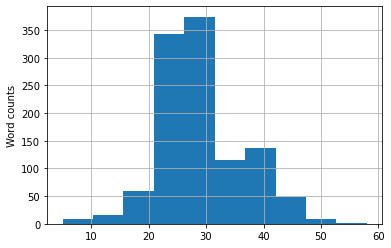

In [11]:
fin_news['word_count'] = fin_news.headlines.str.split().apply(len)

word_count = fin_news['word_count'].hist().set_ylabel("Word counts")

## Final Dataset Generation

 In order to generate the final dataset that will be used for fine-tuning the model, the above two datasets are merged

In [12]:
# Merge the two datasets.
final_set=phrase_bank.append(fin_news,ignore_index=True)


In [12]:
final_set

,headlines,sentiment,word_count
0,"According to Gran , the company has no plans t...",neutral,25
1,Technopolis plans to develop in stages an area...,neutral,31
2,The international electronic industry company ...,negative,36
3,With the new production plant the company woul...,positive,33
4,According to the company 's updated strategy f...,positive,41
...,...,...,...
5941,The stock market has seen a sharp correction o...,neutral,30
5942,It can be a cyclical business that's dependent...,neutral,28
5943,These Chinese stocks are set to pop after new ...,neutral,30
5944,The portfolio with 15 stocks has an eclectic m...,neutral,32


Below the reader can see the label distribution of the final dataset. The distribution is imbalanced between the three classes which is an important factor to be conisdered when choosing evaluation metrics for the model that will use the dataset for training.

In [13]:
final_set.sentiment.value_counts()

neutral     3418
positive    1574
negative     954
Name: sentiment, dtype: int64

Below the reader can see a histogram of the word counts of the observations

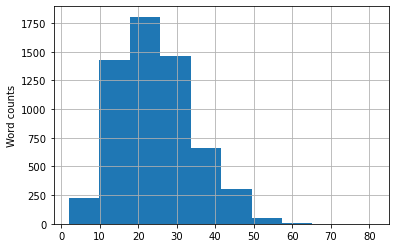

In [14]:
final_set['word_count'] = final_set.headlines.str.split().apply(len)

word_count = final_set['word_count'].hist().set_ylabel("Word counts")

Finally, the dataset is exported to a csv file to be used for fine-tuning the BERT model(see BERTClassification notebook for details). Before exporting, the string labels(negative,neutral,positive) are replaced by numerical values(0,1,2) as that will be required by pytorch when running the model. The word count column added to assist the generation of the histograms is also removed.

In [15]:
replace_values ={'sentiment':{'negative':0,'neutral':1,'positive':2}}
final_set=final_set.replace(replace_values)
final_set=final_set.iloc[::,:2]

In [16]:
# Export the dataset to a csv file
SRC = os.path.join('..','project_datasets')
path = os.path.join(SRC,'bert_dataset.csv')
final_set.to_csv(path,encoding='utf-8-sig')

### Bibliography

[Malo, P., Sinha, A., Takala, P., Korhonen, P. and Wallenius, J. (2013): “Good debt or bad debt: Detecting semantic orientations in economic texts.” Journal of the American Society for Information Science and Technology. (in Press)](https://www.researchgate.net/publication/251231107_Good_Debt_or_Bad_Debt_Detecting_Semantic_Orientations_in_Economic_Texts)

[Sousa, M.G., Sakiyama, K., de Souza Rodrigues, L., Moraes, P.H., Fernandes, E.R. and Matsubara, E.T., 2019, November. BERT for stock market sentiment analysis. In 2019 IEEE 31st International Conference on Tools with Artificial Intelligence (ICTAI) (pp. 1597-1601). IEEE.](https://github.com/stocks-predictor/bert)
